In [2]:
# Packages
import h5py    
import numpy as np    
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.optimize import curve_fit as fit
import func as func

# To quit warnings for showing up in cell outputs:
import warnings
warnings.filterwarnings('ignore')

### v=0 final snapshot fitting

FIT parameters:
rho_0 = 31622776601.683792
log(rho_0) = 10.5
r_s = 0.4


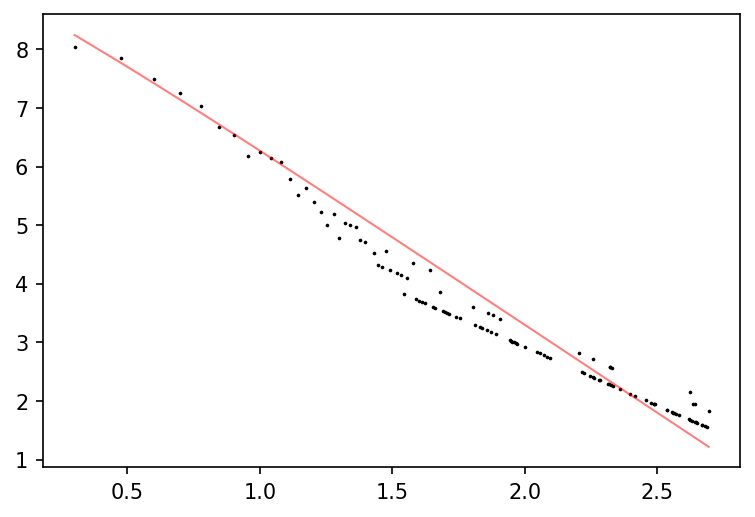

In [134]:
# Directory with data:
datadir = "v0/snaps/"



# Import data:
f = h5py.File(datadir+"snapshot_010.hdf5", "r")
group = f["PartType1"]
data = group["Coordinates"][()]



# Some parameters:
galx,galy,galz=data[:,0],data[:,1],data[:,2]
galcen=[np.median(galx),np.median(galy),np.median(galz)]     # Galaxy center
mp=(1e11)/(len(galx))                                        # Particle mass
galcoords=[galx,galy,galz]



# Centering coordinates, radial distance to center and :
galcoords=np.array(galcoords) - np.resize(np.array(galcen),(3,1))
galdist = []
for i in range(len(galcoords[0])):
    d=np.sqrt((galcoords[0,i]**2)+(galcoords[1,i]**2)+(galcoords[2,i]**2))
    galdist.append(d)

    
    
# Density profile:
prof=[],[] 
Rbin=1
Rins=0
Rmax=np.amax(galdist)

for n in range(2,500):
    R1=Rins
    if (R1>Rmax):
        break
    R2=n*Rbin
    Npart=0
    for i in range(len(galdist)):            # Loop that checks for parwticles between both radius and counts them.
        if (galdist[i]>R1 and galdist[i]<R2):
            Npart+=1
    dens=Npart*mp/(1.25*pi*(R2**3-R1**3))
    if dens==0:
        dens=1
    prof[0].append(R1)
    prof[1].append(dens)
    Rins=R2
    
logprof=np.log10(prof)

pos=[]
for i in range(len(logprof[1])):
    if logprof[1][i]==0:
        pos.append(i)

logdens=np.delete(logprof[1],pos)
lograd=np.delete(logprof[0],pos)



# Fitting to NFW:
init_guesses=[10**8.5,10]
r=10**lograd
popt,pcov=fit(func.logNFW,r,logdens,[10**10.5,0.4])



# Plotting radial profile and fit:
plt.figure(dpi=150)
plt.plot(lograd,logdens,'k.',ms=1.5)
plt.plot(lograd,func.logNFW(r,popt[0],popt[1]),'r-',alpha=0.5,linewidth=1)
plt.savefig("v0_NFWfit.PNG")
print("FIT parameters:\n"+"rho_0 = "+str(popt[0])+"\n"+"log(rho_0) = "+str(np.log10(popt[0]))+"\nr_s = "+str(popt[1]))



#end

### Hubble flow NFW fit

FIT parameters:
rho_0 = 31622776.60168379
log(rho_0) = 7.5
r_s = 4.0


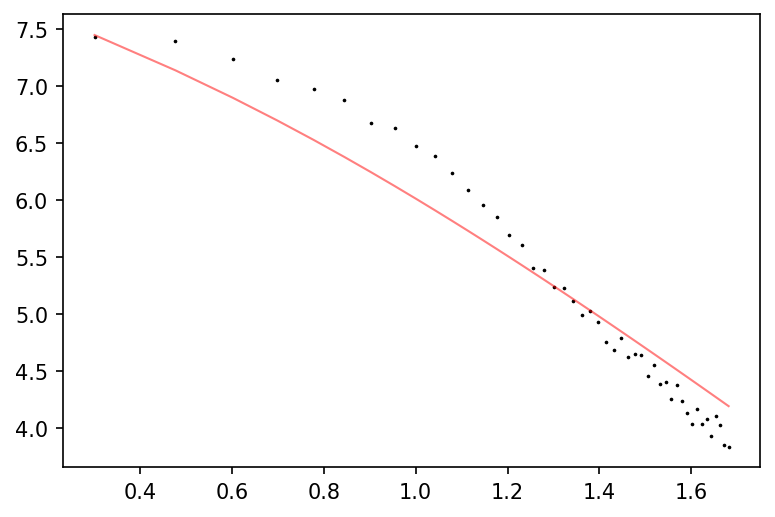

In [148]:
# Directory with data:
datadir = "hubble-flow-n10000/snaps/"



# Import data:
f = h5py.File(datadir+"snapshot_010.hdf5", "r")
group = f["PartType1"]
data = group["Coordinates"][()]



# Some parameters:
galx,galy,galz=data[:,0],data[:,1],data[:,2]
galcen=[np.median(galx),np.median(galy),np.median(galz)]     # Galaxy center
mp=(1e11)/(len(galx))                                        # Particle mass
galcoords=[galx,galy,galz]



# Centering coordinates, radial distance to center and :
galcoords=np.array(galcoords) - np.resize(np.array(galcen),(3,1))
galdist = []
for i in range(len(galcoords[0])):
    d=np.sqrt((galcoords[0,i]**2)+(galcoords[1,i]**2)+(galcoords[2,i]**2))
    galdist.append(d)

    
    
# Density profile:
prof=[],[] 
Rbin=1
Rins=0
Rmax=np.amax(galdist)

for n in range(2,50):
    R1=Rins
    if (R1>Rmax):
        break
    R2=n*Rbin
    Npart=0
    for i in range(len(galdist)):            # Loop that checks for parwticles between both radius and counts them.
        if (galdist[i]>R1 and galdist[i]<R2):
            Npart+=1
    dens=Npart*mp/(1.25*pi*(R2**3-R1**3))
    if dens==0:
        dens=1
    prof[0].append(R1)
    prof[1].append(dens)
    Rins=R2
    
logprof=np.log10(prof)

pos=[]
for i in range(len(logprof[1])):
    if logprof[1][i]==0:
        pos.append(i)

logdens=np.delete(logprof[1],pos)
lograd=np.delete(logprof[0],pos)



# Fitting to NFW:
init_guesses=[10**8.5,10]
r=10**lograd
popt,pcov=fit(func.logNFW,r,logdens,[10**7.5,4])



# Plotting radial profile and fit:
plt.figure(dpi=150)
plt.plot(lograd,logdens,'k.',ms=1.5)
plt.plot(lograd,func.logNFW(r,popt[0],popt[1]),'r-',alpha=0.5,linewidth=1)
plt.savefig("v0_NFWfit.PNG")
print("FIT parameters:\n"+"rho_0 = "+str(popt[0])+"\n"+"log(rho_0) = "+str(np.log10(popt[0]))+"\nr_s = "+str(popt[1]))



#end

In [80]:
lograd

array([      -inf, 0.30103   , 0.47712125, 0.60205999, 0.69897   ,
       0.77815125, 0.84509804, 0.90308999, 0.95424251, 1.        ,
       1.04139269, 1.07918125, 1.11394335, 1.14612804, 1.17609126,
       1.20411998, 1.23044892, 1.25527251, 1.2787536 , 1.30103   ,
       1.32221929, 1.34242268, 1.36172784, 1.38021124, 1.39794001,
       1.43136376, 1.44715803, 1.462398  , 1.47712125, 1.49136169,
       1.51851394, 1.53147892, 1.54406804, 1.5563025 , 1.5797836 ])

In [82]:
logprof[0]

array([      -inf, 0.30103   , 0.47712125, 0.60205999, 0.69897   ,
       0.77815125, 0.84509804, 0.90308999, 0.95424251, 1.        ,
       1.04139269, 1.07918125, 1.11394335, 1.14612804, 1.17609126,
       1.20411998, 1.23044892, 1.25527251, 1.2787536 , 1.30103   ,
       1.32221929, 1.34242268, 1.36172784, 1.38021124, 1.39794001,
       1.41497335, 1.43136376, 1.44715803, 1.462398  , 1.47712125,
       1.49136169, 1.50514998, 1.51851394, 1.53147892, 1.54406804,
       1.5563025 , 1.56820172, 1.5797836 ])